In [1]:
# Install Ultralytics YOLOv8
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.7/112.6 GB disk)


In [3]:
from ultralytics import YOLO


In [7]:
from google.colab import files
uploaded = files.upload()


Saving AccidentsDataset.zip to AccidentsDataset.zip


In [8]:
import zipfile
import os

zip_path = "/content/AccidentsDataset.zip"  # Change this to your uploaded file
extract_path = "/content/incident_detection"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [16]:
import yaml

# Define dataset paths (Update these paths based on where your dataset is stored)
dataset_path = "/content/incident_detection/AccidentsDataset"  # Change if using Google Drive
train_path = f"{dataset_path}/images/train"
val_path = f"{dataset_path}/images/val"
test_path = f"{dataset_path}/images/test"  # Add test path

data_yaml = {
    'train': train_path,
    'val': val_path,
    'test': test_path,  # Add test data
    'nc': 1,
    'names': ['accident']
}

# Save YAML file
yaml_file_path = f"{dataset_path}/data.yaml"

with open(yaml_file_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"✅ data.yaml created successfully at: {yaml_file_path}")


✅ data.yaml created successfully at: /content/incident_detection/AccidentsDataset/data.yaml


In [10]:
import os

dataset_path = "/content/incident_detection/AccidentsDataset/"
print("Training Images:", len(os.listdir(dataset_path + "images/train")))
print("Validation Images:", len(os.listdir(dataset_path + "images/val")))
print("Training Labels:", len(os.listdir(dataset_path + "labels/train")))
print("Validation Labels:", len(os.listdir(dataset_path + "labels/val")))


Training Images: 2406
Validation Images: 658
Training Labels: 2406
Validation Labels: 658


In [ ]:
from ultralytics import YOLO
import torch
# Load YOLOv8 model (Choose model size: yolov8n.pt, yolov8s.pt, yolov8m.pt, etc.)
model = YOLO('yolov8n.pt')  # 'yolov8s.pt' is stronger but uses more resources

# Train the model
model.train(data='/content/incident_detection/AccidentsDataset/data.yaml',  # Correct dataset path
            epochs=50,    # Adjust based on performance
            batch=16,     # Reduce if running out of memory
            imgsz=640,    # Image size (standard YOLOv8 training size)
            workers=2,    # Reduce if hitting RAM limits
            device='cuda' if torch.cuda.is_available() else 'cpu')  # Ensure GPU is used


In [18]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')  # Load trained model

results = model.val(data='/content/incident_detection/AccidentsDataset/data.yaml', split='test')  # Use test set

print(results)  # Print metrics


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/incident_detection/AccidentsDataset/labels/test... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<00:00, 2344.16it/s]

val: New cache created: /content/incident_detection/AccidentsDataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.67it/s]


                   all        184        193      0.942      0.917      0.971      0.669
Speed: 5.6ms preprocess, 5.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7baba838b410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

In [22]:
import pandas as pd

csv_path = '/content/runs/detect/train/results.csv'  # Adjust path if needed
df = pd.read_csv(csv_path)

print(df.columns)  # List all available columns


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


Column 'val/mAP50' not found. Check CSV file!
Column 'val/mAP50-95' not found. Check CSV file!


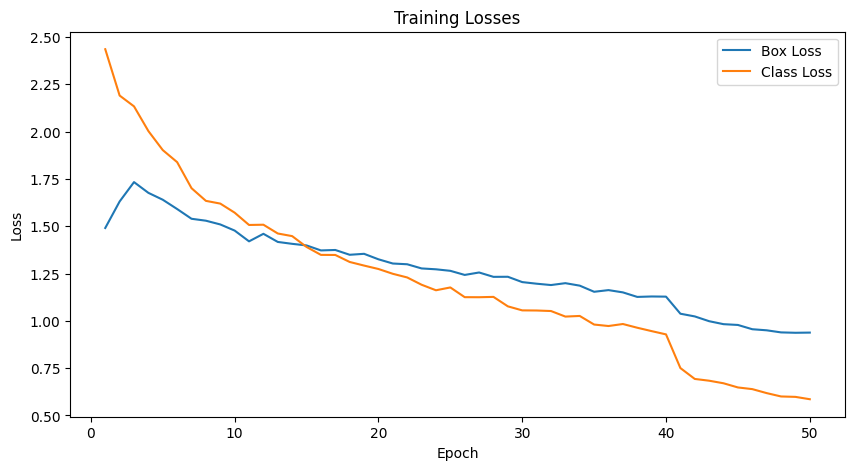

<Figure size 1000x500 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Replace with the correct column names from your CSV
epoch_col = 'epoch'  # Usually it's named 'epoch'
box_loss_col = 'train/box_loss'  # Update if different
cls_loss_col = 'train/cls_loss'  # Update if different
mAP50_col = 'val/mAP50'  # Update if different
mAP50_95_col = 'val/mAP50-95'  # Update if different

# Check if the expected columns exist before plotting
for col in [box_loss_col, cls_loss_col, mAP50_col, mAP50_95_col]:
    if col not in df.columns:
        print(f"Column '{col}' not found. Check CSV file!")

# Plot Losses
plt.figure(figsize=(10, 5))
if box_loss_col in df.columns and cls_loss_col in df.columns:
    plt.plot(df[epoch_col], df[box_loss_col], label='Box Loss')
    plt.plot(df[epoch_col], df[cls_loss_col], label='Class Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Losses')
    plt.legend()
    plt.show()

# Plot mAP
plt.figure(figsize=(10, 5))
if mAP50_col in df.columns and mAP50_95_col in df.columns:
    plt.plot(df[epoch_col], df[mAP50_col], label='mAP@50')
    plt.plot(df[epoch_col], df[mAP50_95_col], label='mAP@50-95')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.title('Mean Average Precision (mAP)')
    plt.legend()
    plt.show()
